In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

In [5]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range (N//2+1):
        for n in range (N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c
dft([1,2,1,2,1,2,1])

array([10. +0.j        , -0.5-0.24078731j, -0.5-0.62698017j,
       -0.5-2.19064313j])

In [11]:
A = np.loadtxt('pitch.txt')
B = dft(A)

(0, 513)

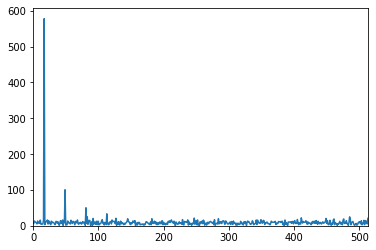

In [22]:
plt.plot(np.arange(len(B))+1, np.abs(B))
plt.ylim(0)
plt.xlim(0, len(B))

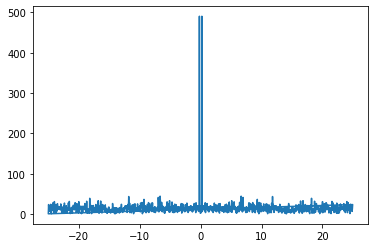

In [34]:
ts = 0.02
p = 5.0
t_vec = np.arange(0, 20, ts)
sig = (np.sin(2*np.pi/p*t_vec)+ 0.5*np.random.randn(t_vec.size))

sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=ts)
plt.plot(sample_freq, power)

In [35]:
pos_mask = np.where(sample_freq>0) #focus on positive side
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print(peak_freq)

0.2


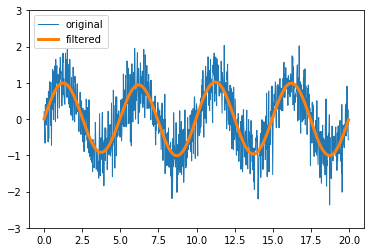

In [39]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq)>peak_freq]=0

filtered_sig = fftpack.ifft(high_freq_fft)

plt.plot(t_vec, sig, lw=1, label='original')
plt.plot(t_vec, filtered_sig.real, lw=3, label='filtered')
plt.ylim(-3, 3)
plt.legend()